# アタポン
* アタポンの2001位データに絞る
* とりあえずpystan動かしてみる
  * 試しにローカルレベルモデルで動かす

## インポート

In [1]:
import numpy as np
import pandas as pd
import pickle
import datetime
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=['IPAMincho'])

import pystan

## イベントデータ読み込み

In [2]:
input_dir = '../../common/event_data/'

In [3]:
df = pd.read_pickle(input_dir + 'a3_output_df.pkl')
df = df[df['形式'] == 'アタポン'].reset_index(drop=True)
df

,イベント,1位,2001位,形式,日付,属性,期間
0,アタシポンコツアンドロイド,427777,78330,アタポン,2015-09-25,NaN,249.0
1,Nation Blue,324369,67627,アタポン,2015-10-19,NaN,198.0
2,Orange Sapphire,350000,42944,アタポン,2015-11-20,NaN,150.0
3,Snow Wings,520000,50954,アタポン,2015-12-18,NaN,222.0
4,パステルピンクな恋,602529,43854,アタポン,2016-01-20,NaN,174.0
5,オルゴールの小箱,523819,56737,アタポン,2016-02-18,NaN,174.0
6,絶対特権主張しますっ！,530000,51353,アタポン,2016-03-20,NaN,174.0
7,つぼみ,666666,47907,アタポン,2016-04-19,NaN,174.0
8,明日また会えるよね,844167,58517,アタポン,2016-05-19,NaN,198.0
9,咲いてJewel,650152,77930,アタポン,2016-06-20,NaN,174.0


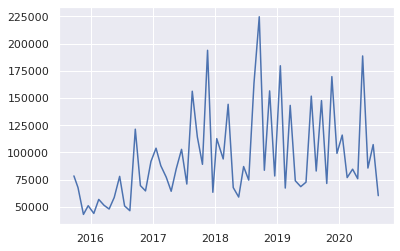

In [5]:
# プロットしてみる
fig = plt.figure()
ax = fig.add_subplot(111)
x = df.loc[:, '日付']
y = df.loc[:, '2001位']
ax.plot(x, y)
plt.show()

## 時系列データ準備
元データは日付の間隔がバラバラなので、等間隔にする

In [6]:
# 週データ（直前の月曜）追加
# 月ごとだとイベント被る、日ごとだと細かすぎるため
df['week'] = df['日付'].apply(lambda x: x - datetime.timedelta(days=x.weekday()))

In [7]:
print('最初', df['week'].min())
print('最後', df['week'].max())

最初 2015-09-21
最後 2020-08-17


In [8]:
# 開始日から終了日までの全日付が入ったリスト作る
start_dt = df['week'].min()
end_dt = df['week'].max()
# 日付差の週数を算出（リストに最終日も含めたいので、＋１する）
weeks_num = (end_dt - start_dt).days // 7 + 1
# リスト作成
datelist = [start_dt + 7*timedelta(days=x) for x in range(weeks_num)]
print('日数', len(datelist))
print('開始日', datelist[0])
print('終了日', datelist[-1])

日数 257
開始日 2015-09-21
終了日 2020-08-17


In [9]:
# 全週にイベントデータ結合
df_all = pd.DataFrame({'week': datelist})
df_all = pd.merge(df_all, df, how='left', on='week')
df_all

,week,イベント,1位,2001位,形式,日付,属性,期間
0,2015-09-21,アタシポンコツアンドロイド,427777.0,78330.0,アタポン,2015-09-25,NaN,249.0
1,2015-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-19,Nation Blue,324369.0,67627.0,アタポン,2015-10-19,NaN,198.0
...,...,...,...,...,...,...,...,...
252,2020-07-20,太陽の絵の具箱,1120703.0,107142.0,アタポン,2020-07-20,NaN,174.0
253,2020-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,2020-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,2020-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# 使い回せるので保存
save_dir = '../event_data'
df_all.to_pickle(save_dir + '/b1_output_df.pkl')

## stanデータ準備

In [11]:
# 欠損でない位置のindex番号+1
# stanは0ではなく1スタートなので+1してる
obs_no = list(map(lambda x: x+1, df_all[(~(df_all['2001位'].isnull()))].index.tolist()))

In [12]:
# データ（辞書型）
dat = {
    'T':       len(datelist),         # 全日付の日数
    'len_obs': len(df),               # データがある日付の日数
    'y':       df['2001位'].tolist(), # 観測値
    'obs_no':  obs_no,                # 観測値がある場所（あったらTrue、欠損だとFalse）
}

In [13]:
# Stanコード
model = """
data {
  int T;                   // データ取得期間の長さ
  int len_obs;             // 観測値が得られた個数
  vector[len_obs] y;       // 観測値
  int obs_no[len_obs];     // 観測値が得られた時点
}
parameters {
  vector[T] mu;
  real<lower=0> s_w;
  real<lower=0> s_v;
}
model {
  for(i in 2:T){
    mu[i] ~ normal(mu[i-1], s_w);
  }
  for(i in 1:len_obs){
    y[i] ~ normal(mu[obs_no[i]], s_v);
  }
}
"""

# Stan実行

In [12]:
# コンパイル
%time stm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5ba8a52cb7c154bf6cc6e08b79667e8e NOW.
C:\Users\kazuy\Anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\kazuy\AppData\Local\Temp\tmp4sqi_07n\stanfit4anon_model_5ba8a52cb7c154bf6cc6e08b79667e8e_2423540720288343944.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


Wall time: 32.3 s


In [13]:
# パラメータ設定
n_itr = 10000
n_warmup = n_itr - 1000
chains = 3

In [14]:
# 計算
%time fit = stm.sampling(data=dat, iter=n_itr, chains=chains, n_jobs=-1, warmup=n_warmup, algorithm="NUTS", verbose=False)

Wall time: 2min 1s


In [17]:
# 時間かかるのでfit後のファイル保存
save_dir = '../event_data/'
with open(save_dir + 'b1_stan.pickle', mode="wb") as f:
    pickle.dump(fit, f)

C:\Users\kazuy\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  after removing the cwd from sys.path.


In [18]:
# 読み込み
with open(save_dir + 'b1_stan.pickle', mode="rb") as f:
    fit = pickle.load(f)

In [19]:
fit

Inference for Stan model: anon_model_5ba8a52cb7c154bf6cc6e08b79667e8e.
3 chains, each with iter=10000; warmup=9000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=3000.

          mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu[0]    6.4e4  917.64  1.6e4  3.2e4  5.4e4  6.5e4  7.6e4  9.5e4    311   1.01
mu[1]    6.4e4  934.86  1.6e4  3.3e4  5.4e4  6.5e4  7.5e4  9.4e4    291   1.01
mu[2]    6.4e4  950.13  1.6e4  3.2e4  5.4e4  6.4e4  7.5e4  9.3e4    268   1.01
mu[3]    6.4e4  968.36  1.5e4  3.3e4  5.4e4  6.4e4  7.4e4  9.3e4    250   1.01
mu[4]    6.4e4  1092.7  1.5e4  3.4e4  5.4e4  6.4e4  7.4e4  9.2e4    188   1.01
mu[5]    6.4e4  1119.6  1.5e4  3.3e4  5.4e4  6.4e4  7.4e4  9.1e4    181   1.01
mu[6]    6.3e4  1166.0  1.5e4  3.4e4  5.4e4  6.4e4  7.4e4  9.1e4    162   1.01
mu[7]    6.3e4  1207.4  1.5e4  3.3e4  5.4e4  6.4e4  7.3e4  9.1e4    147   1.01
mu[8]    6.3e4  1254.2  1.5e4  3.3e4  5.3e4  6.4e4  7.3e4  9.0e4    136   1.01
mu[9]    6.3e4  1264

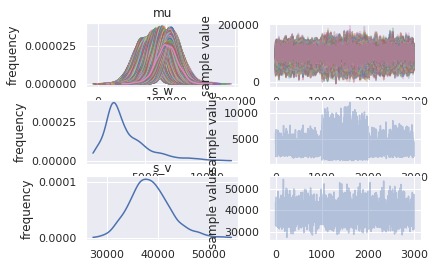

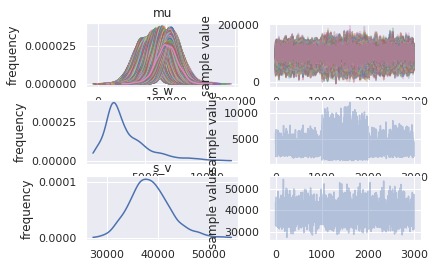

In [20]:
fit.plot()

In [22]:
#結果を抽出
ms = fit.extract() 

#muの事後平均を算出
mu_mean = ms['mu'].mean(axis=0)

#95パーセンタイルを抽出
mu_5 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 5), axis=0))
mu_95 = np.array(pd.DataFrame(ms['mu']).apply(lambda x: np.percentile(x, 95), axis=0))

#x軸
X = df.week
X_all = df_all.week

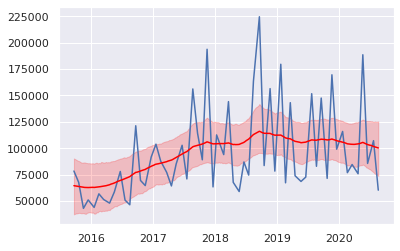

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(X, df['2001位'], label='observed')
# ax.plot(X, mu, label='true trend', c='green')
ax.plot(X_all, mu_mean, label='predicted trend', c='red')
plt.fill_between(X_all, mu_5, mu_95, color='red', alpha=0.2)
# plt.legend(loc='upper left', borderaxespad=0, fontsize=15)
plt.show()

全然当たっていないが、とりあえず中心あたりは通ってる気がする